# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information.

cities_df=[]
appendlist={}

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    city=('%20').join(city.split(' '))
    #response = requests.get(query_url + city).json()
    print(f'{query_url}{city}')
    try:
        appendlist={"city Name":(response["name"])
                    ,"Temperature (F)":(response["main"]["temp"])
                    ,"Humidity (%)":(response["main"]["humidity"])
                    ,"Cloudiness (%)":(response["clouds"]["all"])
                    ,"Wind Speed (mph)":(response["wind"]["speed"])
                    ,"Lng":(response["coord"]["lon"])
                    ,"Latitude":(response["coord"]["lat"])
                    #convert timestamp to date
                    ,"Date":(pd.Timestamp((response["dt"]), unit='s').date())
                   }
        cities_df.append(appendlist)
    except:
        city=(' ').join(city.split('%20'))
        print(f'City name :{city}.....No City data found' )
    


http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=punta%20arenas
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=roald
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=jaru
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=samusu
City name :samusu.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=castro
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=college
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b4

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=coihaique
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=lagoa
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=port%20alfred
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=marsh%20harbour
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=upernavik
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=khatanga
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=fortuna
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=salinas
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=bhuj
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=saucillo
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=graciano%20sanchez
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=gizo
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=paciran
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=dillon
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=bur%20gabo
City name :bur gabo.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaf

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=magadan
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=basco
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=kingaroy
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=koslan
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=carutapera
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=russell
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=yumen
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=oranj

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=buala
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=magan
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=nome
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=moerai
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=palmer
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=aswan
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=strichen
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=simao
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=burpengary
http://api

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=plyussa
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=eureka
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=piacabucu
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=santa%20maria
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=nizhneyansk
City name :nizhneyansk.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=saint-augustin
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=gualeguay
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=pisco
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=charters%20towers
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=dawei
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=bolungarvik
City name :bolungarvik.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=rocha
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=calderitas
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=geraldton
http://api.openweathermap.org/data/2.5/weather?appi

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=kalispell
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=kota%20kinabalu
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=tezu
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=novominskaya
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=dafeng
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=tumannyy
City name :tumannyy.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=bukachacha
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=bentiu
http://api.openweathermap.org/data/2.5/weather?appid=45

http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=mozarlandia
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=fort%20nelson
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=korem
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=aripuana
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=imbituba
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=that%20phanom
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=la%20ronge
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=uusikaupunki
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:

# Drop duplicate cities in 'City'
Unique_cities = cities_df.drop_duplicates("city Name", keep='first')

# Save the DataFrame as a csv
Unique_cities=pd.DataFrame(Unique_cities)
Unique_cities.to_csv("city_weather_data.csv", encoding="utf-8", index=False)



In [17]:
file = "city_weather_data.csv"
cities_df = pd.read_csv(file)
cities_df.head()

,city Name,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lng,Latitude,Date
0,Punta Arenas,50.00,87,20,8.05,-70.92,-53.15,2020-03-04
1,Busselton,88.79,10,59,9.08,115.33,-33.65,2020-03-04
2,Taoudenni,67.60,13,0,6.51,-3.98,22.68,2020-03-04
3,Roald,36.18,56,100,11.41,6.13,62.58,2020-03-04
4,Jaru,71.49,99,99,2.15,-62.47,-10.44,2020-03-04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

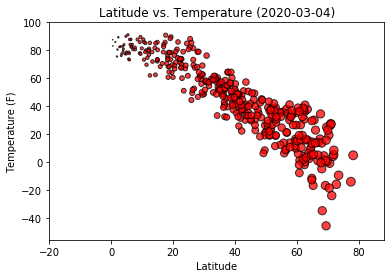

In [64]:
Lat_temp_x = cities_df[["Latitude"]].values

Lat_temp_y=cities_df[["Temperature (F)"]].values 

plt.scatter(Lat_temp_x, Lat_temp_y, marker="o", facecolors="red", edgecolors="black",s=Lat_temp_x,alpha=0.75)
plt.xlim(-20,Lat_temp_x.max()+10)
plt.ylim(Lat_temp_y.min()-10,Lat_temp_y.max()+3.2)
plt.title("Latitude vs. Temperature (2020-03-04)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/Latitude_Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

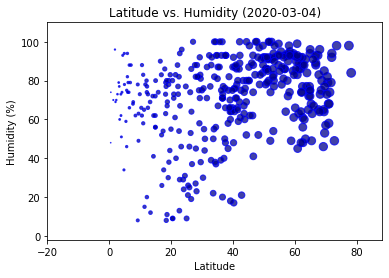

In [65]:
Lat_humidity_x =cities_df[["Latitude"]].values
Lat_humidity_y =cities_df[["Humidity (%)"]].values

plt.scatter(Lat_humidity_x, Lat_humidity_y, marker="o", facecolors="darkblue", edgecolors="blue",s=Lat_humidity_x,alpha=0.75)
plt.xlim(-20,Lat_humidity_x.max()+10)
plt.ylim(Lat_humidity_y.min()-10,Lat_humidity_y.max()+10)
plt.title("Latitude vs. Humidity (2020-03-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/Latitude_Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

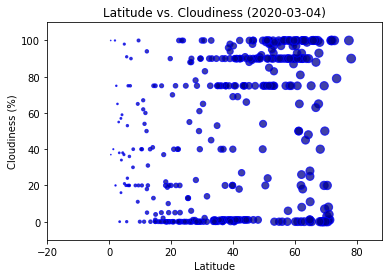

In [67]:
Lat_cloud_x =cities_df[["Latitude"]].values
Lat_cloud_y =cities_df[["Cloudiness (%)"]].values

plt.scatter(Lat_cloud_x, Lat_cloud_y, marker="o", facecolors="darkblue", edgecolors="blue",s=Lat_cloud_x,alpha=0.75)
plt.xlim(-20,Lat_cloud_x.max()+10)
plt.ylim(Lat_cloud_y.min()-10,Lat_cloud_y.max()+10)
plt.title("Latitude vs. Cloudiness (2020-03-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/Latitude_Cloudiness.png")
plt.show()



#### Latitude vs. Wind Speed Plot

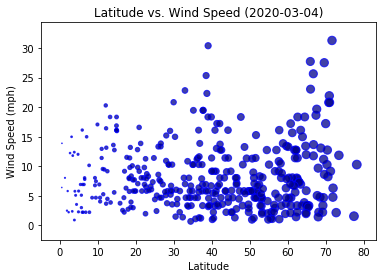

In [68]:
Lat_wind_x =cities_df[["Latitude"]].values
Lat_wind_y =cities_df[["Wind Speed (mph)"]].values

plt.scatter(Lat_wind_x, Lat_wind_y, marker="o", facecolors="darkblue", edgecolors="blue",s=Lat_wind_x,alpha=0.75)
plt.xlim(-5,Lat_wind_x.max()+5)
plt.ylim(Lat_wind_y.min()-3,Lat_wind_y.max()+1)
plt.title("Latitude vs. Wind Speed (2020-03-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/Latitude_WindSpeed.png")
plt.show()


## Linear Regression

In [52]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regres(x,y):
    x_values=x
    y_values=y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')


In [53]:
# Create Northern and Southern Hemisphere DataFrames

Sourthern_df =cities_df.loc[cities_df["Latitude"]<0,:]

Northern_df =cities_df.loc[cities_df["Latitude"]>=0,:]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

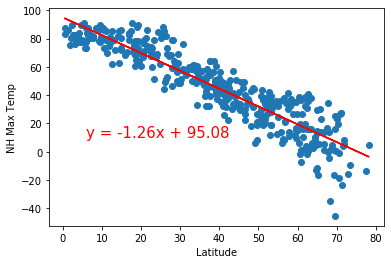

In [54]:
NH_Max_temps=Northern_df[["city Name","Temperature (F)","Latitude"]].groupby("city Name").max()
x_values=NH_Max_temps["Latitude"].values
y_values=NH_Max_temps["Temperature (F)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Max Temp')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

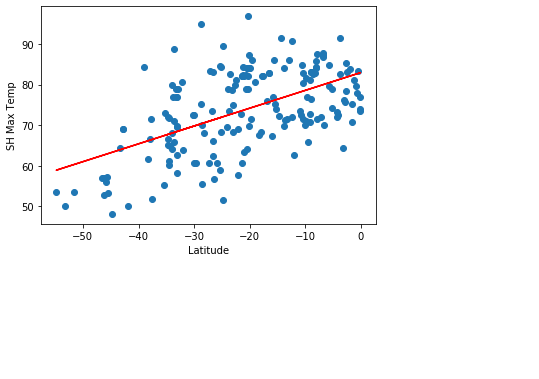

In [55]:
SH_Max_temps=Sourthern_df[["city Name","Temperature (F)","Latitude"]].groupby("city Name").max()
x_values=SH_Max_temps["Latitude"].values
y_values=SH_Max_temps["Temperature (F)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

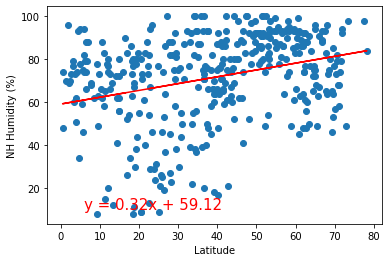

In [56]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Humidity (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

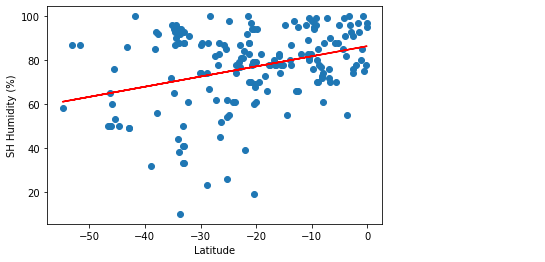

In [57]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Humidity (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

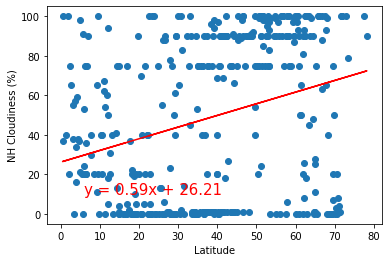

In [58]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Cloudiness (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Cloudiness (%)')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

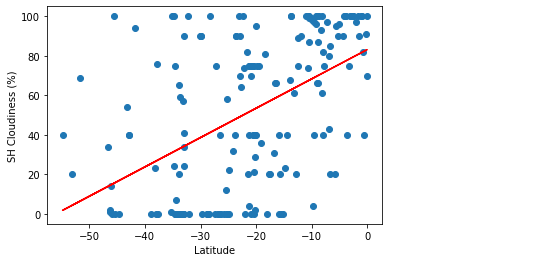

In [59]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Cloudiness (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

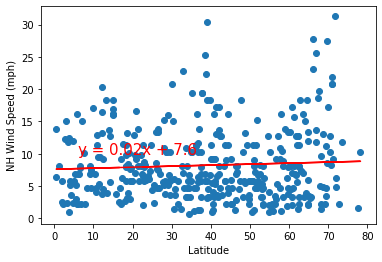

In [60]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Wind Speed (mph)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

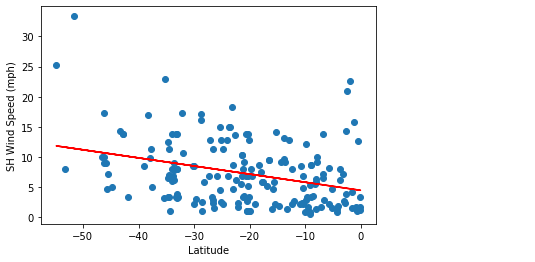

In [61]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Wind Speed (mph)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Wind Speed (mph)')
plt.show()